## Heart Disease Prediction

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("heartdisease_u5z_lx9fv.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [53]:
df.shape

(253680, 16)

In [54]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [55]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [56]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [57]:
df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

### Exploratory Data Analysis

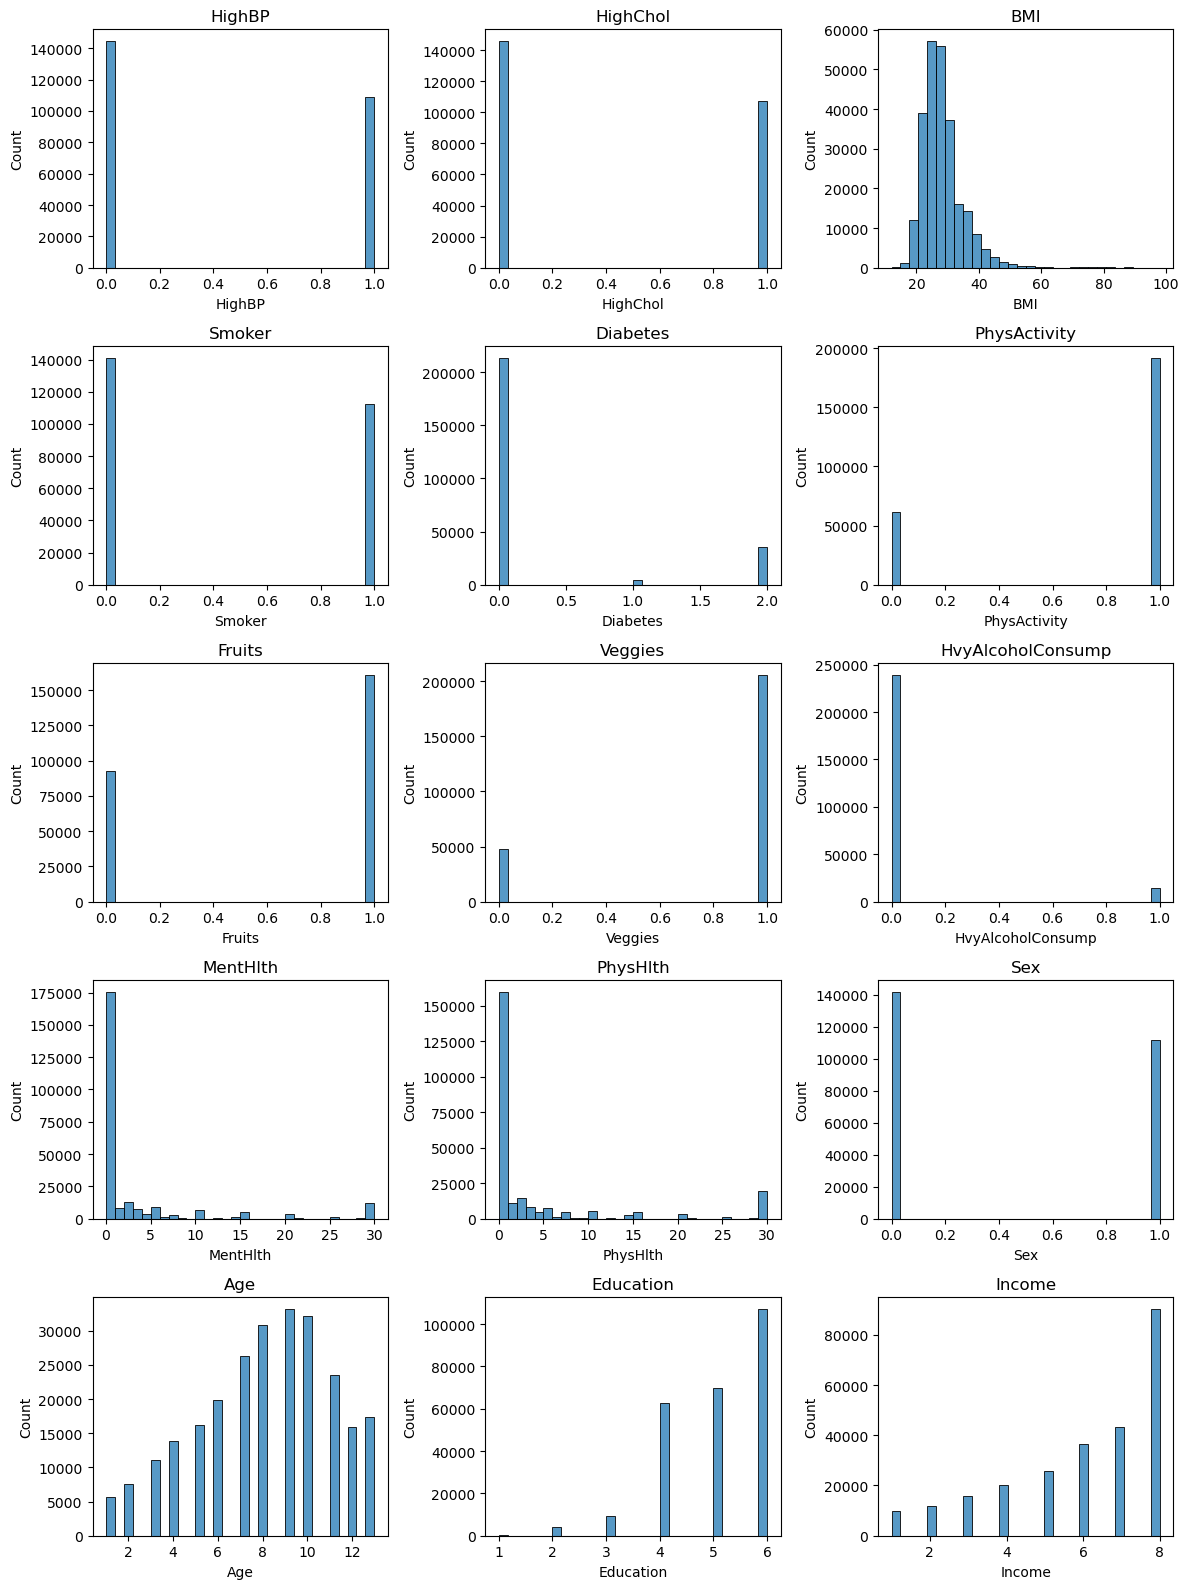

In [58]:
# univeriate anylasis graph all the columns 
rows = 5
columns = 3

fig, axes = plt.subplots(rows,columns,figsize=(12,16))
axes = axes.flatten()

for x, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], bins=30, ax=axes[x])
    axes[x].set_title(col)

plt.tight_layout()
plt.show()

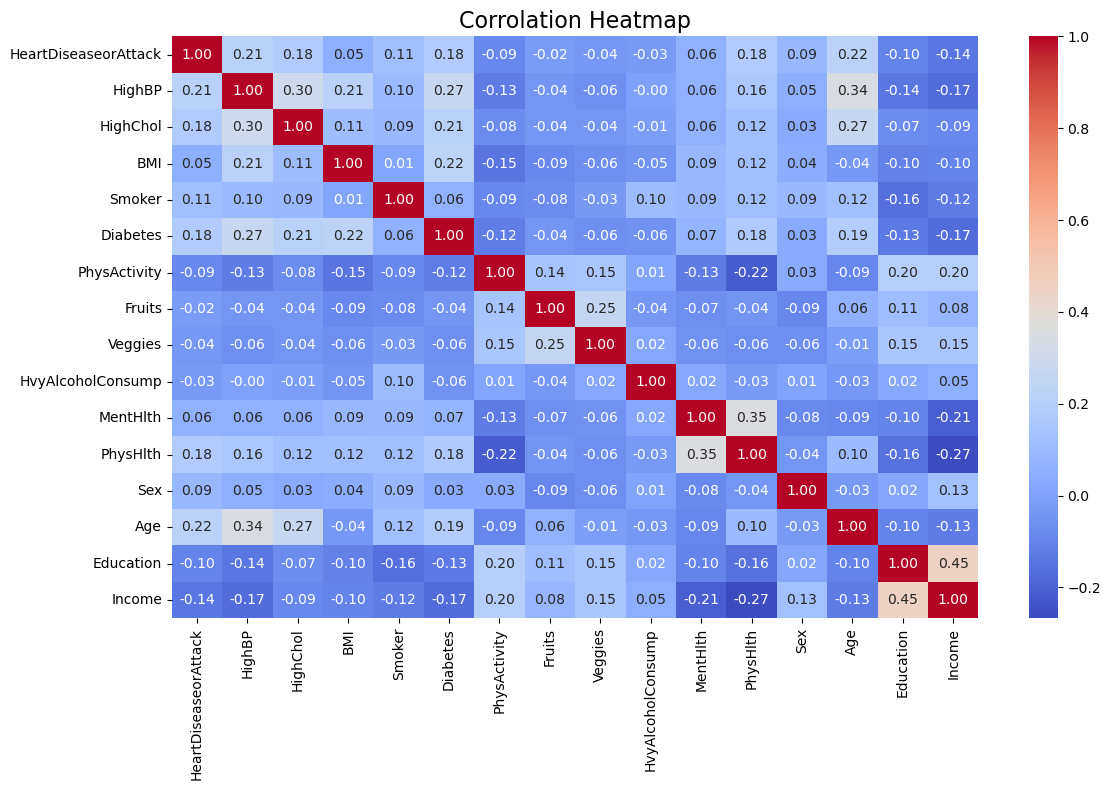

In [59]:
corrolation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrolation_matrix, annot=True, fmt='.2f', cmap ='coolwarm')

plt.title("Corrolation Heatmap", size = 16)
plt.tight_layout()
plt.show()

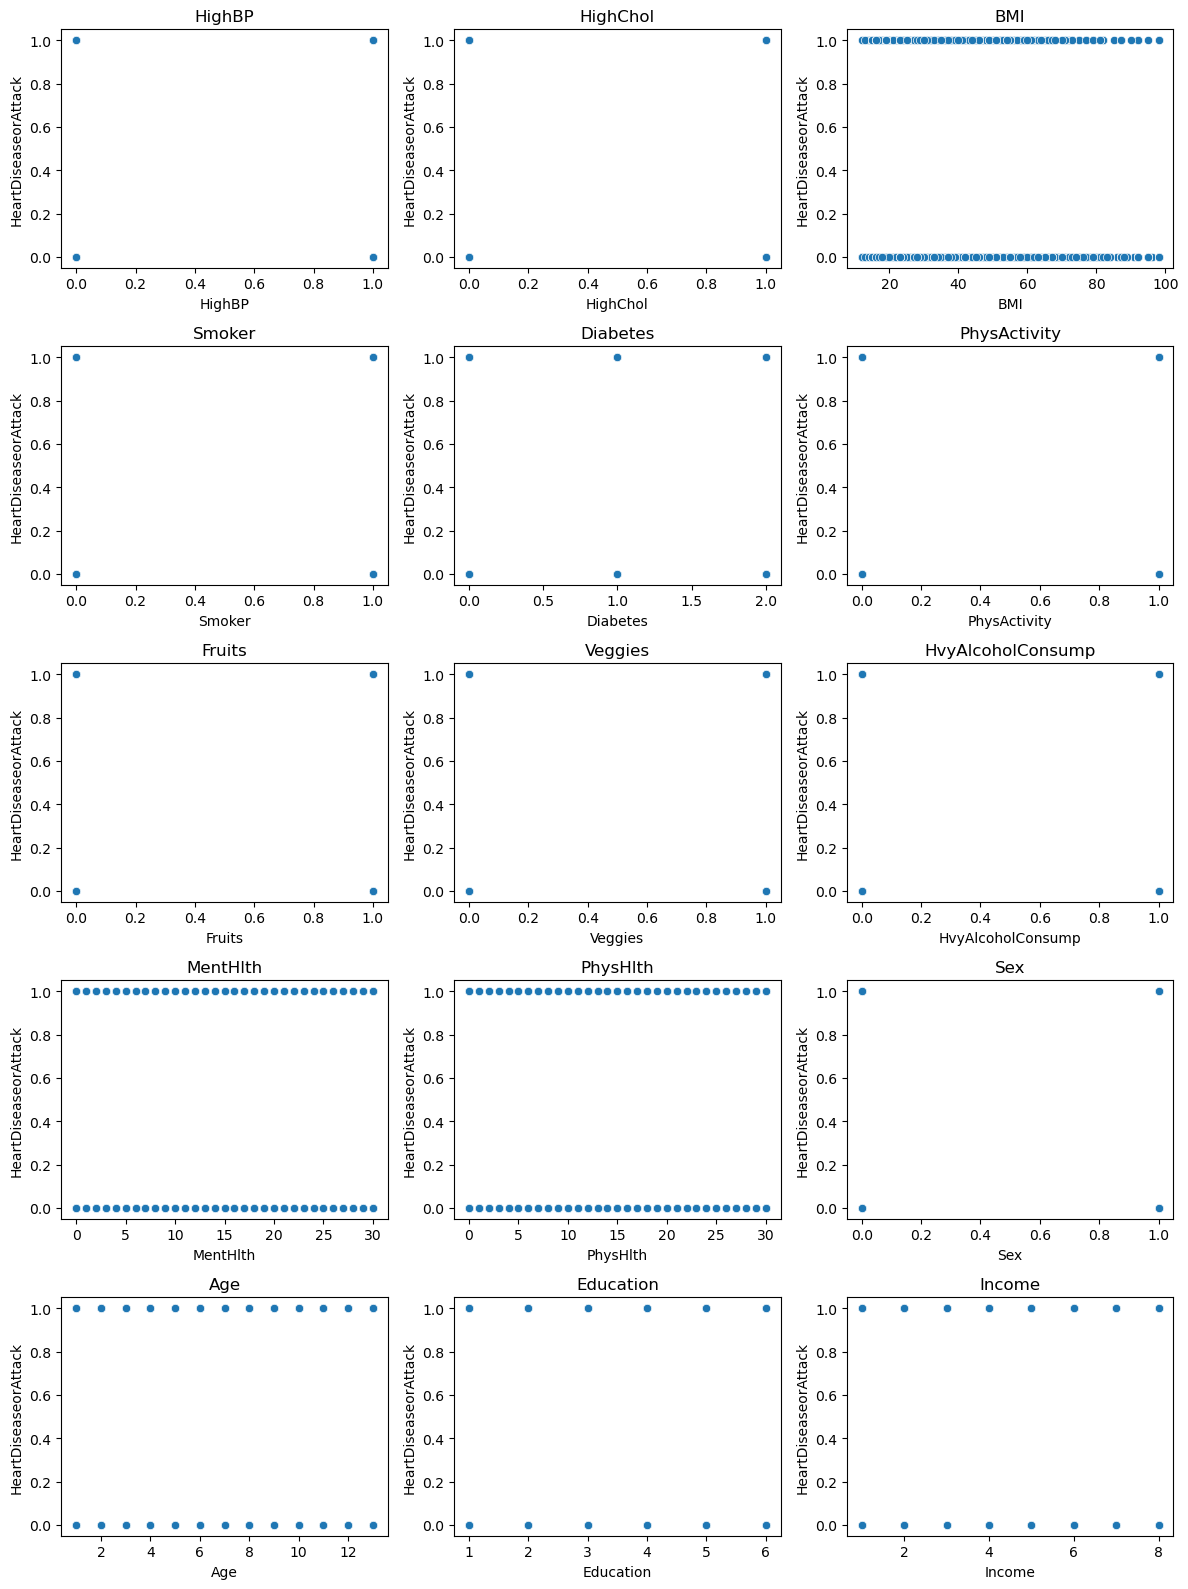

In [60]:
# bivariate anylasis - graphy each column along with 
# heartdiseaseorattack column 
# univeriate anylasis graph all the columns 
rows = 5
columns = 3

fig, axes = plt.subplots(rows,columns,figsize=(12,16))
axes = axes.flatten()

for x, col in enumerate(df.columns[1:]):
    sns.scatterplot(y = df["HeartDiseaseorAttack"], x = df[col], data = df, ax=axes[x])
    axes[x].set_title(col)

plt.tight_layout()
plt.show()

In [61]:
# creating new features 

# summing up unhealthy habits into a single feature 
df["UnhealthyHabits"] = df['Smoker'] + df['HvyAlcoholConsump'] + df['HighBP'] + df['HighChol'] + df['Diabetes']

# health risk score based on BMI and Physics Health 
df['HealthRiskScore'] = df['BMI'] * df['PhysHlth']

# ratio between physics and mental health 
df['PhysMentalRatio'] = df['PhysHlth'] / (df['MentHlth'] + 1) # adding 1 to avoid division by zero errors 


In [62]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income,UnhealthyHabits,HealthRiskScore,PhysMentalRatio
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0,3.0,600.0,0.789474
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,1.0,0.0,0.000000
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0,2.0,840.0,0.967742
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0,0.0,0.000000
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0,2.0,0.0,0.000000


### Model Experimentation 

In [63]:
x = df.iloc[:,1:]
y = df['HeartDiseaseorAttack']

In [64]:
x

,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income,UnhealthyHabits,HealthRiskScore,PhysMentalRatio
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0,3.0,600.0,0.789474
1,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,1.0,0.0,0.000000
2,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0,2.0,840.0,0.967742
3,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0,0.0,0.000000
4,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0,2.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0,2.0,225.0,5.000000
253676,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0,4.0,0.0,0.000000
253677,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0.0,0.0,0.000000
253678,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,1.0,0.0,0.000000


In [65]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =42)


In [67]:
# 1. Logistic regression model 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 

# scale the features for faster convergence 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model1 = LogisticRegression()
model1.fit(x_train_scaled, y_train)

LogisticRegression()

In [68]:
y_pred = model1.predict(x_test_scaled)

In [69]:
model1.score(x_test_scaled, y_test)

0.9068708609271523

In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[45675   293]
 [ 4432   336]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.53      0.07      0.12      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.53      0.54     50736
weighted avg       0.88      0.91      0.87     50736



In [72]:
# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model1.predict_proba(x_test_scaled)[:, 1]))

Logistic Regression Performance
Accuracy: 0.9068708609271523
Precision: 0.534181240063593
Recall: 0.07046979865771812
F1 Score: 0.1245136186770428
ROC-AUC: 0.8271014659928295


In [73]:
# from sklearn.metrics import roc_curve, auc
# y_pred_proba = model1.predict_proba(x_test_scaled)[:, 1]
# false_pos, true_pos, thres = roc_curve(y_test, y_pred_proba)
# roc_auc = auc(false_pos, true_pos)
# roc_auc

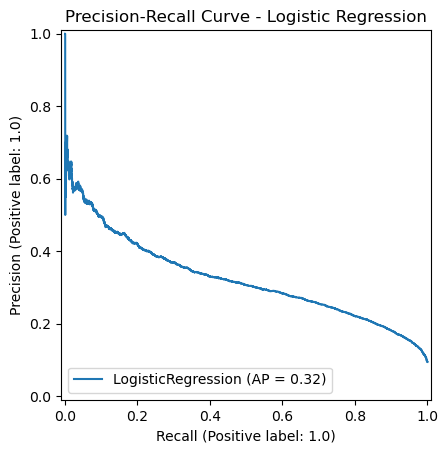

In [74]:
# Precision-Recall curve for Logisstic regression
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model1, x_test_scaled, y_test)
plt.title("Precision-Recall Curve - Logistic Regression")
plt.show()

In [75]:
# recall value for 1 is very low therefore will try oversampling and undersampling techniques 

# smote for oversampling 
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy ='minority', random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train)

# retrain 
model1_res = LogisticRegression()
model1_res.fit(x_train_res, y_train_res)

y_pred_res = model1_res.predict(x_test_scaled)

#evaluate
print(classification_report(y_test, y_pred_res))

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     45968
         1.0       0.23      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736



In [76]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model1_res.predict_proba(x_test_scaled)[:, 1]
false_pos, true_pos, thres = roc_curve(y_test, y_pred_res)
roc_auc = auc(false_pos, true_pos)
roc_auc

 

0.752799729955125

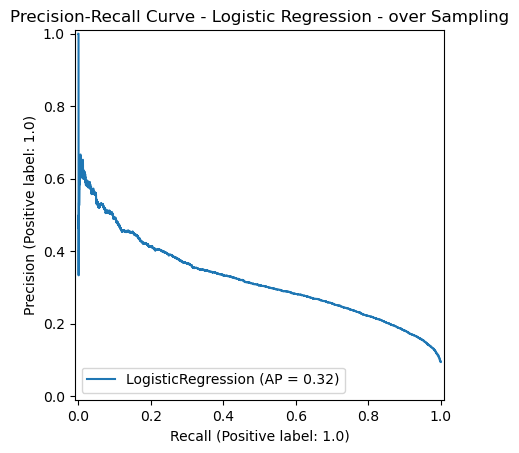

In [77]:
# Precision-Recall curve for Logisstic regression
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model1_res, x_test_scaled, y_test)
plt.title("Precision-Recall Curve - Logistic Regression - over Sampling")
plt.show()

Note: recall for 0 has decreased, however recall for 1 has increased! 

In [78]:
# nearMiss - for undersampling 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_train_miss, y_train_miss = nm.fit_resample(x_train_scaled, y_train)

# retrain 
model1_miss = LogisticRegression()
model1_miss.fit(x_train_miss, y_train_miss)

y_pred_miss = model1_miss.predict(x_test_scaled)

#evaluate
print(classification_report(y_test, y_pred_miss))

              precision    recall  f1-score   support

         0.0       0.96      0.40      0.56     45968
         1.0       0.13      0.83      0.22      4768

    accuracy                           0.44     50736
   macro avg       0.54      0.62      0.39     50736
weighted avg       0.88      0.44      0.53     50736



In [79]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model1_miss.predict_proba(x_test_scaled)[:, 1]
false_pos, true_pos, thres = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_pos, true_pos)
print(roc_auc)

print("ROC-AUC:", roc_auc_score(y_test, model1_miss.predict_proba(x_test_scaled)[:, 1]))

0.6889079566694485
ROC-AUC: 0.6889079566694485


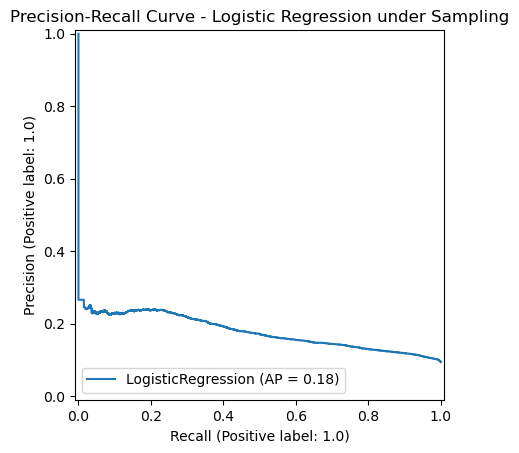

In [80]:
# Precision-Recall curve for Logisstic regression  Undersampling
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model1_miss, x_test_scaled, y_test)
plt.title("Precision-Recall Curve - Logistic Regression under Sampling")
plt.show()

Note: due to undersamplng majority class, recall has decreased to 40%. THerefore, I will use the SMOTE model which gives me better recall and accuracy. 

In [81]:
# 2. Desicion Tree Model (using the SMOTE model) 
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'gini')
model2.fit(x_train_res, y_train_res)


DecisionTreeClassifier()

In [82]:
y_pred = model2.predict(x_test_scaled)

In [83]:
model2.score(x_test_scaled, y_test)

0.8463024282560706

In [84]:
print(confusion_matrix(y_test, y_pred))

[[41743  4225]
 [ 3573  1195]]


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     45968
         1.0       0.22      0.25      0.23      4768

    accuracy                           0.85     50736
   macro avg       0.57      0.58      0.57     50736
weighted avg       0.86      0.85      0.85     50736



In [86]:
print("Desicion Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model2.predict_proba(x_test_scaled)[:, 1]))

Desicion Tree Performance
Accuracy: 0.8463024282560706
Precision: 0.22047970479704798
Recall: 0.25062919463087246
F1 Score: 0.23458971338829995
ROC-AUC: 0.5826243274428432


In [87]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model2.predict_proba(x_test_scaled)[:, 1]
false_pos, true_pos, thres = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_pos, true_pos)
roc_auc

0.5826243274428432

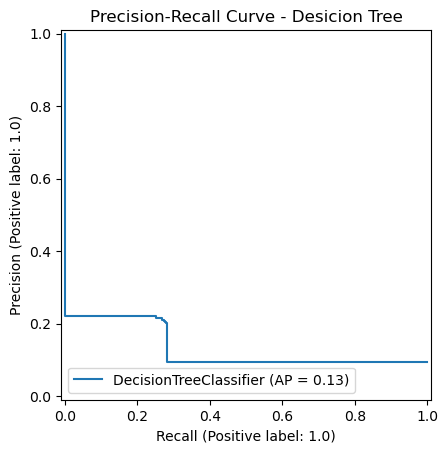

In [88]:
# Precision-Recall curve for Desicion Tree
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model2, x_test_scaled, y_test)
plt.title("Precision-Recall Curve - Desicion Tree")
plt.show()

In [89]:
model2.feature_importances_

array([0.00765136, 0.00882623, 0.08238631, 0.00758691, 0.00578646,
       0.01240106, 0.01349104, 0.01055313, 0.0032215 , 0.0228091 ,
       0.05746358, 0.02142095, 0.46850734, 0.03480791, 0.07708485,
       0.10741303, 0.04100383, 0.0175854 ])

In [90]:
features = pd.DataFrame({'Features': x.columns, 'Importance' : model2.feature_importances_})
features = features.sort_values('Importance', ascending=False)
features

,Features,Importance
12,Age,0.468507
15,UnhealthyHabits,0.107413
2,BMI,0.082386
14,Income,0.077085
10,PhysHlth,0.057464
16,HealthRiskScore,0.041004
13,Education,0.034808
9,MentHlth,0.022809
11,Sex,0.021421
17,PhysMentalRatio,0.017585


In [91]:
# rerun model with important features 
top_features = features.head(5)['Features'].tolist()

In [92]:
x_train_filtered = x_train[top_features]
x_test_filtered = x_test[top_features]

In [93]:
x_train_filtered = scaler.fit_transform(x_train_filtered)
x_test_filtered = scaler.transform(x_test_filtered)


In [94]:
model2_rerun = DecisionTreeClassifier(criterion = 'gini')
model2_rerun.fit(x_train_filtered, y_train)

DecisionTreeClassifier()

In [95]:
y_pred = model2_rerun.predict(x_test_filtered)

In [96]:
model2_rerun.score(x_test_filtered, y_test)

0.8822729422894986

In [97]:
print(confusion_matrix(y_test, y_pred))

[[44186  1782]
 [ 4191   577]]


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94     45968
         1.0       0.24      0.12      0.16      4768

    accuracy                           0.88     50736
   macro avg       0.58      0.54      0.55     50736
weighted avg       0.85      0.88      0.86     50736



In [99]:
print("Desicion Tree Rerun Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model2_rerun.predict_proba(x_test_filtered)[:, 1]))

Desicion Tree Rerun Performance
Accuracy: 0.8822729422894986
Precision: 0.24459516744383214
Recall: 0.12101510067114093
F1 Score: 0.1619194612038726
ROC-AUC: 0.6095065795332966


In [100]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model2_rerun.predict_proba(x_test_filtered)[:, 1]
false_pos, true_pos, thres = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_pos, true_pos)
roc_auc

0.6095065795332966

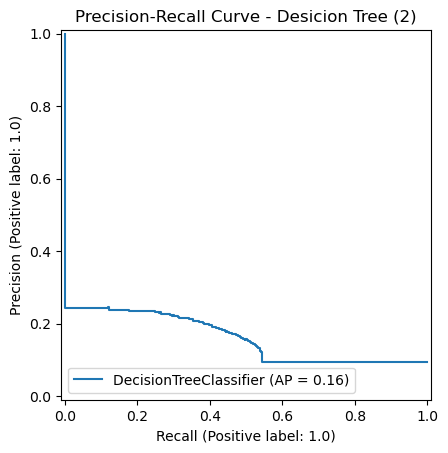

In [101]:
# Precision-Recall curve for Desicion Tree (2)
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model2_rerun, x_test_filtered, y_test)
plt.title("Precision-Recall Curve - Desicion Tree (2)")
plt.show()

In [102]:
# Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini')
# using SMOTE resampled data
rf.fit(x_train_res, y_train_res)


RandomForestClassifier()

In [103]:
y_pred = rf.predict(x_test_scaled)

In [104]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf.predict_proba(x_test_scaled)[:, 1]
false_pos, true_pos, thres = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_pos, true_pos)
roc_auc

0.7827366561864162

In [105]:
# testing multiple estimators:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_result = []
test_result = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators= estimator, n_jobs=1)
    rf.fit(x_train_res, y_train_res)
    train_pred = rf.predict(x_train_res)
    false_pos, true_pos, thres = roc_curve(y_train_res, train_pred)
    roc_auc = auc(false_pos, true_pos)
    train_result.append(roc_auc)
    y_pred = rf.predict(x_test_scaled)
    false_pos, true_pos, thres = roc_curve(y_test, y_pred)
    roc_auc = auc(false_pos, true_pos)
    test_result.append(roc_auc)


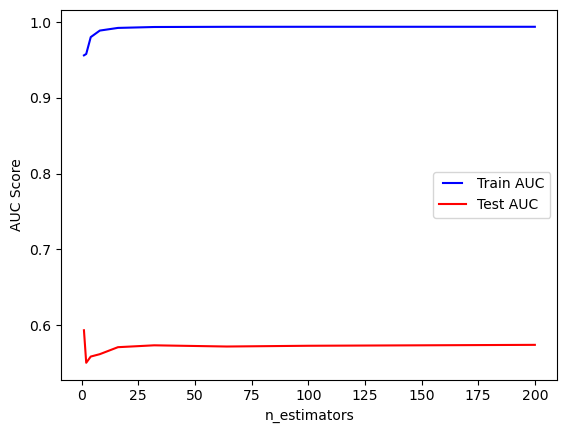

In [106]:
#graphing 
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_result, 'b', label = 'Train AUC')
line2, = plt.plot(n_estimators, test_result, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

Based on the graph, we will opt for 32 estimators 

In [107]:
# Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', n_estimators = 32)
# using SMOTE resampled data
rf.fit(x_train_res, y_train_res)
y_pred = rf.predict(x_test_scaled)

In [108]:
rf.score(x_test_scaled, y_test)

0.8845001576789656

In [109]:
print(confusion_matrix(y_test, y_pred))

[[43977  1991]
 [ 3869   899]]


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     45968
         1.0       0.31      0.19      0.23      4768

    accuracy                           0.88     50736
   macro avg       0.62      0.57      0.59     50736
weighted avg       0.86      0.88      0.87     50736



In [111]:
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(x_test_scaled)[:, 1]))

Random Forest Performance
Accuracy: 0.8845001576789656
Precision: 0.3110726643598616
Recall: 0.1885486577181208
F1 Score: 0.2347871506920867
ROC-AUC: 0.7736835107023678


In [112]:
# false_pos, true_pos, thres = roc_curve(y_test, y_pred)
# roc_auc = auc(false_pos, true_pos)
# roc_auc

0.5726179592106093

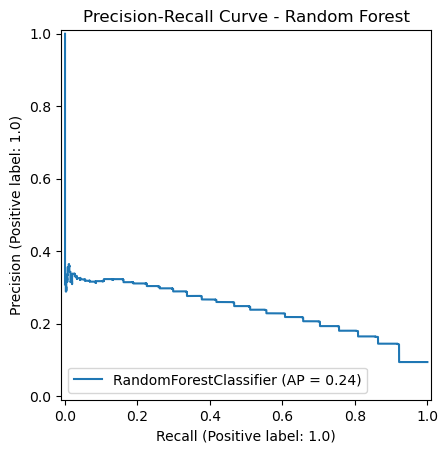

In [113]:
# Precision-Recall curve for Random Forest
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(rf, x_test_scaled, y_test)
plt.title("Precision-Recall Curve - Random Forest")
plt.show()


In [114]:

# importing rf model for gui useage 
import joblib

# Save the model
joblib.dump(rf, 'heart_disease_model.joblib')

['heart_disease_model.joblib']

Top 5 Most Important Features:
            Feature  Importance
12              Age    0.273077
14           Income    0.116191
2               BMI    0.112142
15  UnhealthyHabits    0.080785
10         PhysHlth    0.060515


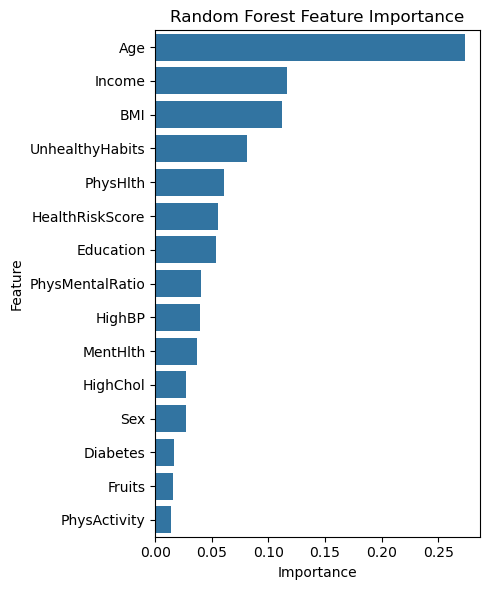

In [115]:
# Extract feature importances
importances = rf.feature_importances_

# Create DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display top features
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))

# Visualize feature importances
plt.figure(figsize=(5, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [128]:
# train new model based on top 5 features 

X = df[['Age', 'BMI', 'UnhealthyHabits', 'Income', 'PhysHlth']]
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=32, random_state=42)
rf.fit(X_train_scaled, y_train)

# Save the model and scaler
joblib.dump(rf, 'heart_disease_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']